# Vehicle Crashes in Maryland from January 2015 through September 2021

### Introduction :

According to the National Safety Council report, approximately 38,300 people were killed and about 4.4 million injured in the road accidents United States in 2015. There are a variety of reasons that contribute to accidents. Some of the reasons are adverse Weather and Traffic conditions that cause accident prone situations. Predicting likelihood of vehicular crashes due to the effect of Weather and Traffic features would be a major step towards achieving better road safety.

- There was an average of 115,555 car accidents each year in Maryland over a five-year period. 
- Baltimore accounted for an average of 36.5 percent of all Maryland car accidents during the same five-year timeframe. 

### Datasets :


Dataset - 1(Crash data for Maryland from January 2015 through September 2021):
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Vehicle-Details/mhft-5t5y

Dataset -2 (Maryland Statewide Vehicle Crashes - Vehicle Details): 
https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf



### Dataset - 1 : Vehicle Crash Data

### Source :

"Open Data Portal" of Maryland. Does not violate any laws to download the file. This is public and real time data set.

- Rows : 742925
- Cols : 56
- Size : ~50 MB


In [1]:
####importing Required Packages####

import numpy as np # For linear algebra
import pandas as pd #For data processing
import matplotlib.pyplot as plt  # For data visualization
import re # For Regular Expression
%matplotlib inline 
import seaborn as sns
sns.set(color_codes=True)

In [2]:
pd.set_option('display.max_rows', None) # Diplay max rows in notebook
pd.set_option('display.max_columns', None) # Diplay max rows in notebook

In [3]:
#Importing the data file from folder 

df_v = pd.read_csv("C:\\Users\\diksh\\OneDrive\\Desktop\\DATA SCIENCE\\DATA-601\\data601-2\\Final\\Maryland_Statewide_Vehicle_Crashes.csv", low_memory=False)


In [4]:
#checking the columns
df_v.columns

Index(['YEAR', 'QUARTER', 'LIGHT_DESC', 'LIGHT_CODE', 'COUNTY_DESC',
       'COUNTY_NO', 'MUNI_DESC', 'MUNI_CODE', 'JUNCTION_DESC', 'JUNCTION_CODE',
       'COLLISION_TYPE_DESC', 'COLLISION_TYPE_CODE', 'SURF_COND_DESC',
       'SURF_COND_CODE', 'LANE_DESC', 'LANE_CODE', 'RD_COND_DESC',
       'RD_COND_CODE', 'RD_DIV_DESC', 'RD_DIV_CODE', 'FIX_OBJ_DESC',
       'FIX_OBJ_CODE', 'REPORT_NO', 'REPORT_TYPE', 'WEATHER_DESC',
       'WEATHER_CODE', 'ACC_DATE', 'ACC_TIME', 'LOC_CODE', 'SIGNAL_FLAG_DESC',
       'SIGNAL_FLAG', 'C_M_ZONE_FLAG', 'AGENCY_CODE', 'AREA_CODE',
       'HARM_EVENT_DESC1', 'HARM_EVENT_CODE1', 'HARM_EVENT_DESC2',
       'HARM_EVENT_CODE2', 'RTE_NO', 'ROUTE_TYPE_CODE', 'RTE_SUFFIX',
       'LOG_MILE', 'LOGMILE_DIR_FLAG_DESC', 'LOGMILE_DIR_FLAG',
       'MAINROAD_NAME', 'DISTANCE', 'FEET_MILES_FLAG_DESC', 'FEET_MILES_FLAG',
       'DISTANCE_DIR_FLAG', 'REFERENCE_NO', 'REFERENCE_TYPE_CODE',
       'REFERENCE_SUFFIX', 'REFERENCE_ROAD_NAME', 'LATITUDE', 'LONGITUDE',
       'L

In [5]:
# Number of rows and columns
df_v.shape

(742925, 56)

In [6]:
# First 5 rows of the dataset
df_v.head()

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,COLLISION_TYPE_DESC,COLLISION_TYPE_CODE,SURF_COND_DESC,SURF_COND_CODE,LANE_DESC,LANE_CODE,RD_COND_DESC,RD_COND_CODE,RD_DIV_DESC,RD_DIV_CODE,FIX_OBJ_DESC,FIX_OBJ_CODE,REPORT_NO,REPORT_TYPE,WEATHER_DESC,WEATHER_CODE,ACC_DATE,ACC_TIME,LOC_CODE,SIGNAL_FLAG_DESC,SIGNAL_FLAG,C_M_ZONE_FLAG,AGENCY_CODE,AREA_CODE,HARM_EVENT_DESC1,HARM_EVENT_CODE1,HARM_EVENT_DESC2,HARM_EVENT_CODE2,RTE_NO,ROUTE_TYPE_CODE,RTE_SUFFIX,LOG_MILE,LOGMILE_DIR_FLAG_DESC,LOGMILE_DIR_FLAG,MAINROAD_NAME,DISTANCE,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,AE58770052,Property Damage Crash,Not Applicable,0.00,20200618,15:15:00,NaN,No,N,N,BACOPD,UNK,Parked Vehicle,2.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2020,Q2,NaN,6.02,Baltimore City,24.0,NaN,NaN,Non Intersection,1.0,Other,88,Dry,2.0,Left Turn Lane,2.0,No Defects,1.0,One-way Trafficway,2.0,Other Pole,10.0,ADJ984001J,Injury Crash,NaN,7.01,20200430,06:39:00,1003,Yes,Y,N,BALTIMORE,UNK,Other Vehicle,1.0,Other Vehicle,1.0,NaN,NaN,NaN,0,NaN,NaN,CHARLES STREET,2,Miles,M,N,NaN,NaN,NaN,NORTH AVE,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2020,Q2,Daylight,1.00,Montgomery,15.0,NaN,NaN,NaN,NaN,Other,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,EJ7878001D,Injury Crash,NaN,6.01,20200504,09:46:00,54222,No,N,N,GAITHERSBURG,UNK,Pedestrian,3.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,2017,Q2,Daylight,1.00,Baltimore City,24.0,NaN,NaN,NaN,NaN,Single Vehicle,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,ADI7910042,Injury Crash,Other,88.00,20170507,10:39:00,CAD#0830,Yes,Y,N,BALTIMORE,UNK,NaN,3.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,2020,Q2,Daylight,1.00,Cecil,7.0,NaN,NaN,NaN,NaN,Same Direction Rear End,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not Applicable,0.0,MSP6709008R,Property Damage Crash,NaN,6.01,20200414,17:32:00,NaN,No,N,N,MSP,UNK,Other Vehicle,1.0,Not Applicable,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.611028,-75.951314,POINT (-75.951314 39.611027833333)


In [7]:
# Sanity Check 
#to find duplicate rows
df_v.duplicated().sum()

0

In [8]:
# describe data
df_v.describe()

,YEAR,LIGHT_CODE,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_CODE,COLLISION_TYPE_CODE,SURF_COND_CODE,LANE_CODE,RD_COND_CODE,RD_DIV_CODE,FIX_OBJ_CODE,WEATHER_CODE,ACC_DATE,HARM_EVENT_CODE1,HARM_EVENT_CODE2,LATITUDE,LONGITUDE
count,742925.000000,742925.000000,742917.000000,0.0,551361.000000,668268.000000,742925.000000,668268.000000,563610.000000,668268.000000,668268.000000,742925.000000,742925.000000,7.429250e+05,742925.000000,742925.000000,742925.000000,742925.000000
mean,2017.801719,3.963448,12.791573,NaN,106.943295,2.662389,21.286291,2.666948,1.484970,1.791736,4.631326,4.362295,6.280528,2.017869e+07,3.951088,2.143169,39.146113,-76.744280
std,1.920156,13.626118,7.886309,NaN,293.752627,10.004417,29.881888,9.212468,0.803701,8.600540,13.872810,14.865446,10.321513,1.917721e+04,8.585353,7.587574,0.310253,0.467763
min,2015.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.015010e+07,0.000000,0.000000,37.000000,-79.996100
25%,2016.000000,1.000000,3.000000,NaN,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,6.010000,2.016082e+07,1.000000,0.000000,38.983251,-76.940058
50%,2018.000000,1.000000,15.000000,NaN,0.000000,1.000000,11.000000,2.000000,1.000000,1.000000,2.000000,0.000000,6.010000,2.018041e+07,1.000000,0.000000,39.229453,-76.707057
75%,2019.000000,3.000000,18.000000,NaN,0.000000,2.000000,17.000000,2.000000,2.000000,1.000000,4.000000,4.000000,6.010000,2.019112e+07,3.000000,1.000000,39.346165,-76.574621
max,2021.000000,99.000000,24.000000,NaN,999.000000,99.000000,99.000000,99.000000,18.000000,99.000000,99.000000,99.000000,99.000000,2.021093e+07,99.000000,99.000000,39.994802,-75.000000


In [9]:
#column types Info
df_v.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742925 entries, 0 to 742924
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   742925 non-null  int64  
 1   QUARTER                742925 non-null  object 
 2   LIGHT_DESC             715309 non-null  object 
 3   LIGHT_CODE             742925 non-null  float64
 4   COUNTY_DESC            742917 non-null  object 
 5   COUNTY_NO              742917 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              551361 non-null  float64
 8   JUNCTION_DESC          643419 non-null  object 
 9   JUNCTION_CODE          668268 non-null  float64
 10  COLLISION_TYPE_DESC    742925 non-null  object 
 11  COLLISION_TYPE_CODE    742925 non-null  int64  
 12  SURF_COND_DESC         666108 non-null  object 
 13  SURF_COND_CODE         668268 non-null  float64
 14  LANE_DESC              563602 non-nu

In [10]:
#Number of NA values
df_v.isnull().sum() 

YEAR                          0
QUARTER                       0
LIGHT_DESC                27616
LIGHT_CODE                    0
COUNTY_DESC                   8
COUNTY_NO                     8
MUNI_DESC                742925
MUNI_CODE                191564
JUNCTION_DESC             99506
JUNCTION_CODE             74657
COLLISION_TYPE_DESC           0
COLLISION_TYPE_CODE           0
SURF_COND_DESC            76817
SURF_COND_CODE            74657
LANE_DESC                179323
LANE_CODE                179315
RD_COND_DESC              74657
RD_COND_CODE              74657
RD_DIV_DESC               78656
RD_DIV_CODE               74657
FIX_OBJ_DESC              39831
FIX_OBJ_CODE                  0
REPORT_NO                     0
REPORT_TYPE              110733
WEATHER_DESC             324237
WEATHER_CODE                  0
ACC_DATE                      0
ACC_TIME                      0
LOC_CODE                 398287
SIGNAL_FLAG_DESC              0
SIGNAL_FLAG                   0
C_M_ZONE

In [11]:
# Missing Values Per Column in Percentages
missing_per = df_v.isnull().mean().sort_values(ascending=False)*100
missing_per = missing_per[missing_per>0]
missing_per

MUNI_DESC                100.000000
RTE_SUFFIX                97.952149
REFERENCE_SUFFIX          97.852273
HARM_EVENT_DESC1          80.150621
FEET_MILES_FLAG_DESC      75.859878
LOC_CODE                  53.610661
WEATHER_DESC              43.643302
MUNI_CODE                 25.785106
LANE_DESC                 24.137430
LANE_CODE                 24.136353
REFERENCE_NO              21.004947
RTE_NO                    20.035939
ROUTE_TYPE_CODE           19.798903
REFERENCE_TYPE_CODE       19.764983
LOGMILE_DIR_FLAG_DESC     19.375442
LOGMILE_DIR_FLAG          19.374230
REPORT_TYPE               14.905004
JUNCTION_DESC             13.393815
DISTANCE                  12.544066
RD_DIV_DESC               10.587341
LOG_MILE                  10.519770
DISTANCE_DIR_FLAG         10.503752
SURF_COND_DESC            10.339805
REFERENCE_ROAD_NAME       10.131844
MAINROAD_NAME             10.050005
FEET_MILES_FLAG           10.049197
SURF_COND_CODE            10.049063
JUNCTION_CODE             10

### Cleaning Data :

To handle all null values, we can use imputation method for missing value by filling it in using fillna function and then drop rows containing missing values.

- Dropping the columns which have missing values percentage greater than 75 %

Dropping columns:
- MUNI_DESC                
- RTE_SUFFIX                
- REFERENCE_SUFFIX          
- HARM_EVENT_DESC1        
- FEET_MILES_FLAG_DESC


In [12]:
df_v.drop(['MUNI_DESC', 'RTE_SUFFIX', 'REFERENCE_SUFFIX', 'HARM_EVENT_DESC1', 'FEET_MILES_FLAG_DESC'] , axis='columns', inplace=True)

Considering important columns :

In [13]:
df_veh = df_v[[
'YEAR',
'QUARTER',
'LIGHT_DESC',
'COUNTY_DESC',
'COLLISION_TYPE_DESC',  
'SURF_COND_DESC', 
'LANE_DESC',          
'RD_COND_DESC',          
'RD_DIV_DESC',          
'FIX_OBJ_DESC',          
'REPORT_NO',             
'REPORT_TYPE',           
'WEATHER_DESC',          
'ACC_DATE',              
'ACC_TIME',                          
'SIGNAL_FLAG_DESC',          
'LATITUDE',             
'LONGITUDE',
'LOCATION']]

<AxesSubplot:>

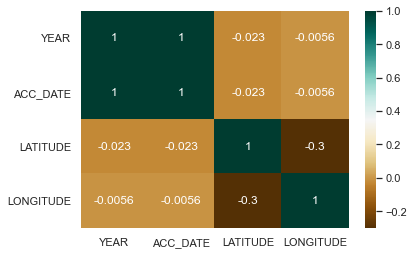

In [14]:
c= df_veh.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Correlation between Accident Date and Year is high as expected. The other categories doesnt have any correlation.

#### Cleaning of column -  LIGHT_DESC 

In [18]:
df_veh['LIGHT_DESC'].unique() # Unique Values

array(['Daylight', 'Unknown', 'Dark Lights On', 'Dark No Lights', 'Dawn',
       'Dark - Unknown Lighting', 'Dusk'], dtype=object)

In [19]:
#Replacing with correct strings
df_veh['LIGHT_DESC'].replace([ 'Not Applicable', 'Other'], ['Unknown', 'Unknown'], inplace=True)
df_veh['LIGHT_DESC'].unique()

array(['Daylight', 'Unknown', 'Dark Lights On', 'Dark No Lights', 'Dawn',
       'Dark - Unknown Lighting', 'Dusk'], dtype=object)

In [20]:
# Filling the blanks with Unknown
df_veh.LIGHT_DESC.fillna("Unknown", inplace=True)
df_veh['LIGHT_DESC'].unique()

array(['Daylight', 'Unknown', 'Dark Lights On', 'Dark No Lights', 'Dawn',
       'Dark - Unknown Lighting', 'Dusk'], dtype=object)

#### Cleaning of column -  COUNTY_DESC 

In [21]:
df_veh['COUNTY_DESC'].unique() # Unique Values

array(['Baltimore', 'Baltimore City', 'Montgomery', 'Cecil',
       'Anne Arundel', 'Frederick', "Prince George's", 'Talbot',
       'Harford', 'Kent', 'Wicomico', "Queen Anne's", 'Worcester',
       'Carroll', 'Howard', 'Charles', 'Garrett', 'Dorchester', 'Calvert',
       'Washington', 'Allegany', "St. Mary's", 'Somerset', 'Caroline',
       nan], dtype=object)

In [22]:
# Filling the blanks with Unknown
df_veh.COUNTY_DESC.fillna("Unknown", inplace=True)
df_veh['COUNTY_DESC'].unique()

array(['Baltimore', 'Baltimore City', 'Montgomery', 'Cecil',
       'Anne Arundel', 'Frederick', "Prince George's", 'Talbot',
       'Harford', 'Kent', 'Wicomico', "Queen Anne's", 'Worcester',
       'Carroll', 'Howard', 'Charles', 'Garrett', 'Dorchester', 'Calvert',
       'Washington', 'Allegany', "St. Mary's", 'Somerset', 'Caroline',
       'Unknown'], dtype=object)

In [23]:
#Replacing with correct strings
df_veh['COUNTY_DESC'].replace([ 'Baltimore City'], ['Baltimore'], inplace=True)
df_veh['COUNTY_DESC'].unique()

array(['Baltimore', 'Montgomery', 'Cecil', 'Anne Arundel', 'Frederick',
       "Prince George's", 'Talbot', 'Harford', 'Kent', 'Wicomico',
       "Queen Anne's", 'Worcester', 'Carroll', 'Howard', 'Charles',
       'Garrett', 'Dorchester', 'Calvert', 'Washington', 'Allegany',
       "St. Mary's", 'Somerset', 'Caroline', 'Unknown'], dtype=object)

#### Cleaning of column -  COLLISION_TYPE_DESC 

In [24]:
df_veh['COLLISION_TYPE_DESC'].unique() # Unique Values

array(['Other', 'Single Vehicle', 'Same Direction Rear End',
       'Same Movement Angle', 'Same Direction Sideswipe', 'Head On',
       'Unknown', 'Same Direction Rear End Left Turn',
       'Head On Left Turn', 'Same Direction Left Turn',
       'Opposite Direction Sideswipe', 'Angle Meets Left Turn',
       'Same Direction Right Turn', 'Same Direction Both Left Turn',
       'Angle Meets Right Turn', 'Same Direction Rear End Right Turn',
       'Opposite Direction Both Left Turn', 'Not Applicable',
       'Angle Meets Left Turn Head On'], dtype=object)

In [25]:
#Replacing with correct strings
df_veh['COLLISION_TYPE_DESC'].replace([ 'Not Applicable', 'Other'], ['Unknown', 'Unknown'], inplace=True)
df_veh['COLLISION_TYPE_DESC'].unique()

array(['Unknown', 'Single Vehicle', 'Same Direction Rear End',
       'Same Movement Angle', 'Same Direction Sideswipe', 'Head On',
       'Same Direction Rear End Left Turn', 'Head On Left Turn',
       'Same Direction Left Turn', 'Opposite Direction Sideswipe',
       'Angle Meets Left Turn', 'Same Direction Right Turn',
       'Same Direction Both Left Turn', 'Angle Meets Right Turn',
       'Same Direction Rear End Right Turn',
       'Opposite Direction Both Left Turn',
       'Angle Meets Left Turn Head On'], dtype=object)

#### Cleaning of column -  SURF_COND_DESC 

In [26]:
df_veh['SURF_COND_DESC'].unique() # Unique Values

array([nan, 'Dry', 'Wet', 'Unknown', 'Not Applicable',
       'Mud, Dirt, Gravel', 'Other', 'Ice', 'Snow'], dtype=object)

In [27]:
#Replacing with correct strings
df_veh['SURF_COND_DESC'].replace([ 'Not Applicable', 'Other'], ['Unknown', 'Unknown'], inplace=True)
df_veh['SURF_COND_DESC'].unique()

array([nan, 'Dry', 'Wet', 'Unknown', 'Mud, Dirt, Gravel', 'Ice', 'Snow'],
      dtype=object)

In [28]:
# Filling the blanks with Unknown
df_veh.SURF_COND_DESC.fillna("Unknown", inplace=True)
df_veh['SURF_COND_DESC'].unique()

array(['Unknown', 'Dry', 'Wet', 'Mud, Dirt, Gravel', 'Ice', 'Snow'],
      dtype=object)

#### Cleaning of column - LANE_DESC

In [29]:
df_veh['LANE_DESC'].unique() # Unique Values

array([nan, 'Left Turn Lane', 'Right Turn Lane', 'Acceleration Lane',
       'Deceleration Lane', 'Shoulder Area', 'Crossover Area', 'Off Road',
       'Separator', 'Parking Lot', 'Gore Area', 'Median Area',
       'Outside Right of Way'], dtype=object)

In [30]:
# Filling the blanks with Unknown
df_veh.LANE_DESC.fillna("Unknown", inplace=True)
df_veh['LANE_DESC'].unique()

array(['Unknown', 'Left Turn Lane', 'Right Turn Lane',
       'Acceleration Lane', 'Deceleration Lane', 'Shoulder Area',
       'Crossover Area', 'Off Road', 'Separator', 'Parking Lot',
       'Gore Area', 'Median Area', 'Outside Right of Way'], dtype=object)

#### Cleaning of column - RD_COND_DESC

In [31]:
df_veh['RD_COND_DESC'].unique() # Unique Values

array([nan, 'No Defects', 'Not Applicable', 'Unknown',
       'Holes, Ruts, Etc.', 'Foreign Material', 'Other',
       'Shoulder Defect', 'Loose Surface Material', 'View Obstructed',
       'Obstruction Not Signaled', 'Obstruction Not Lighted'],
      dtype=object)

In [32]:
#Replacing with correct strings
df_veh['RD_COND_DESC'].replace([ 'Not Applicable', 'Other'], ['Unknown', 'Unknown'], inplace=True)
df_veh['RD_COND_DESC'].unique()

array([nan, 'No Defects', 'Unknown', 'Holes, Ruts, Etc.',
       'Foreign Material', 'Shoulder Defect', 'Loose Surface Material',
       'View Obstructed', 'Obstruction Not Signaled',
       'Obstruction Not Lighted'], dtype=object)

In [33]:
# Filling the blanks with Unknown
df_veh.RD_COND_DESC.fillna("Unknown", inplace=True)
df_veh['RD_COND_DESC'].unique()

array(['Unknown', 'No Defects', 'Holes, Ruts, Etc.', 'Foreign Material',
       'Shoulder Defect', 'Loose Surface Material', 'View Obstructed',
       'Obstruction Not Signaled', 'Obstruction Not Lighted'],
      dtype=object)

#### Cleaning of column - RD_DIV_DESC 

In [34]:
df_veh['RD_DIV_DESC'].unique() # Unique Values

array([nan, 'One-way Trafficway', 'Two-way, Not Divided', 'Unknown',
       'Two-way, Divided, Positive Median Barrier', 'Other',
       'Two-way, Divided, Unprotected (painted >4 feet) Median',
       'Not Applicable'], dtype=object)

In [35]:
#Replacing with correct strings
df_veh['RD_DIV_DESC'].replace([ 'Not Applicable', 'Other'], ['Unknown', 'Unknown'], inplace=True)
df_veh['RD_DIV_DESC'].unique()

array([nan, 'One-way Trafficway', 'Two-way, Not Divided', 'Unknown',
       'Two-way, Divided, Positive Median Barrier',
       'Two-way, Divided, Unprotected (painted >4 feet) Median'],
      dtype=object)

In [36]:
# Filling the blanks with Unknown
df_veh.RD_DIV_DESC.fillna("Unknown", inplace=True)
df_veh['RD_DIV_DESC'].unique()

array(['Unknown', 'One-way Trafficway', 'Two-way, Not Divided',
       'Two-way, Divided, Positive Median Barrier',
       'Two-way, Divided, Unprotected (painted >4 feet) Median'],
      dtype=object)

#### Cleaning of column -  FIX_OBJ_DESC

In [37]:
df_veh['FIX_OBJ_DESC'].unique() # Unique Values

array(['Not Applicable', 'Other Pole', nan, 'Building', 'Fence',
       'Tree Shrubbery', 'Curb', 'Embankment', 'Sign Support Pole',
       'Guardrail or Barrier', 'Light Support Pole', 'Crash Attenuator',
       'Bridge or Overpass', 'Construction Barrier'], dtype=object)

In [38]:
#Replacing with correct strings
df_veh['FIX_OBJ_DESC'].replace([ 'Not Applicable'], ['Unknown'], inplace=True)
df_veh['FIX_OBJ_DESC'].unique()

array(['Unknown', 'Other Pole', nan, 'Building', 'Fence',
       'Tree Shrubbery', 'Curb', 'Embankment', 'Sign Support Pole',
       'Guardrail or Barrier', 'Light Support Pole', 'Crash Attenuator',
       'Bridge or Overpass', 'Construction Barrier'], dtype=object)

In [39]:
# Filling the blanks with Unknown
df_veh.FIX_OBJ_DESC.fillna("Unknown", inplace=True)
df_veh['FIX_OBJ_DESC'].unique()

array(['Unknown', 'Other Pole', 'Building', 'Fence', 'Tree Shrubbery',
       'Curb', 'Embankment', 'Sign Support Pole', 'Guardrail or Barrier',
       'Light Support Pole', 'Crash Attenuator', 'Bridge or Overpass',
       'Construction Barrier'], dtype=object)

#### Cleaning of column - WEATHER_DESC 

In [40]:
df_veh['WEATHER_DESC'].unique() # Unique Values

array(['Not Applicable', nan, 'Other', 'Clear', 'Raining', 'Cloudy',
       'Unknown', 'Severe Winds', 'Foggy', 'Wintry Mix', 'Snow', 'Sleet',
       'Blowing Snow', 'Blowing Sand, Soil, Dirt'], dtype=object)

In [41]:
#Replacing with correct strings
df_veh['WEATHER_DESC'].replace([ 'Not Applicable', 'Other'], ['Unknown', 'Unknown'], inplace=True)
df_veh['WEATHER_DESC'].unique()

array(['Unknown', nan, 'Clear', 'Raining', 'Cloudy', 'Severe Winds',
       'Foggy', 'Wintry Mix', 'Snow', 'Sleet', 'Blowing Snow',
       'Blowing Sand, Soil, Dirt'], dtype=object)

In [42]:
# Filling the blanks with Unknown
df_veh.WEATHER_DESC.fillna("Unknown", inplace=True)
df_veh['WEATHER_DESC'].unique()

array(['Unknown', 'Clear', 'Raining', 'Cloudy', 'Severe Winds', 'Foggy',
       'Wintry Mix', 'Snow', 'Sleet', 'Blowing Snow',
       'Blowing Sand, Soil, Dirt'], dtype=object)

In [43]:
df_veh.head()

,YEAR,QUARTER,LIGHT_DESC,COUNTY_DESC,COLLISION_TYPE_DESC,SURF_COND_DESC,LANE_DESC,RD_COND_DESC,RD_DIV_DESC,FIX_OBJ_DESC,REPORT_NO,REPORT_TYPE,WEATHER_DESC,ACC_DATE,ACC_TIME,SIGNAL_FLAG_DESC,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,Baltimore,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,AE58770052,Property Damage Crash,Unknown,20200618,15:15:00,No,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2020,Q2,Unknown,Baltimore,Unknown,Dry,Left Turn Lane,No Defects,One-way Trafficway,Other Pole,ADJ984001J,Injury Crash,Unknown,20200430,06:39:00,Yes,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431)
2,2020,Q2,Daylight,Montgomery,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,EJ7878001D,Injury Crash,Unknown,20200504,09:46:00,No,39.140680,-77.193413,POINT (-77.193412729561 39.140680249069)
3,2017,Q2,Daylight,Baltimore,Single Vehicle,Unknown,Unknown,Unknown,Unknown,Unknown,ADI7910042,Injury Crash,Unknown,20170507,10:39:00,Yes,39.282928,-76.635215,POINT (-76.6352150952347 39.2829284750108)
4,2020,Q2,Daylight,Cecil,Same Direction Rear End,Unknown,Unknown,Unknown,Unknown,Unknown,MSP6709008R,Property Damage Crash,Unknown,20200414,17:32:00,No,39.611028,-75.951314,POINT (-75.951314 39.611027833333)


### Dataset - 2 : Vehicle Details

### Source :

"Open Data Portal" of Maryland. Does not violate any laws to download the file. This is public and real time data set.

- Rows : 1386222
- Cols : 49
- Size : ~50 MB


In [72]:
#Importing the data file from folder 

df_d = pd.read_csv("C:\\Users\\diksh\\OneDrive\\Desktop\\DATA SCIENCE\\DATA-601\\data601-2\\Final\\Maryland_Statewide_Vehicle_Details.csv", low_memory=False)


In [73]:
df_d.head()

,HARM_EVENT_DESC,HARM_EVENT_CODE,CONTI_DIRECTION_DESC,CONTI_DIRECTION_CODE,DAMAGE_DESC,DAMAGE_CODE,MOVEMENT_DESC,MOVEMENT_CODE,VIN_NO,REPORT_NO,CV_BODY_TYPE_DESC,CV_BODY_TYPE_CODE,VEH_YEAR,VEH_MAKE,VEH_MODEL,COMMERCIAL_FLAG_DESC,COMMERCIAL_FLAG,HZM_NUM,TOWED_AWAY_FLAG_DESC,TOWED_AWAY_FLAG,NUM_AXLES,GVW_DESC,GVW_CODE,GOING_DIRECTION_DESC,GOING_DIRECTION_CODE,BODY_TYPE_DESC,BODY_TYPE_CODE,DRIVERLESS_FLAG_DESC,DRIVERLESS_FLAG,FIRE_FLAG_DESC,FIRE_FLAG,PARKED_FLAG_DESC,PARKED_FLAG,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,HIT_AND_RUN_FLAG,HAZMAT_SPILL_FLAG_DESC,HAZMAT_SPILL_FLAG,VEHICLE_ID,TOWED_VEHICLE_CONFIG_DESC,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,YEAR,Quarter
0,Other Vehicle,1.0,North,N,Unknown,99,Unknown,99.0,NaN,AE5057004X,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,North,N,NaN,NaN,NaN,U,No,N,No,N,25,Yes,Y,NaN,NaN,47e2531d-8c69-470c-9198-502a46c7639e,Unknown,99,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2
1,Other Vehicle,1.0,North,N,Superficial,2,Moving Constant Speed,1.0,NMTKHMBX0JR025092,MSP7221001P,NaN,NaN,2018.0,TOYOTA,CAMRY,No,N,NaN,No,N,NaN,NaN,NaN,North,N,Passenger Car,2.00,No,N,No,N,No,N,55,No,N,NaN,NaN,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,Not Applicable,0,12.0,6.0,12.0,NaN,Twelve o'clock,12.0,2020,Q2
2,Other Vehicle,1.0,South,S,Functional,3,Stopped in Traffic Lane,6.0,2GNAXPEX5K6103012,DA37010040,NaN,NaN,2019.0,CHEVROLET,EQUINOX,No,N,NaN,No,N,NaN,NaN,NaN,South,S,(Sport) Utility Vehicle,23.08,No,N,No,N,No,N,30,No,N,NaN,NaN,f2c0d05c-ff70-4549-9d48-57c182eae6f2,Not Applicable,0,6.0,6.0,NaN,NaN,Six o'clock,6.0,2020,Q2
3,Fixed Object,9.0,Unknown,U,Unknown,99,Not Applicable,0.0,NaN,MDTA1791002C,NaN,NaN,NaN,UNKNOWN,UNKNOWN,No,N,NaN,No,N,NaN,NaN,NaN,Unknown,U,NaN,NaN,No,N,No,N,No,N,35,Yes,Y,NaN,NaN,5a55c4ee-17e9-4eed-bfe9-f5aca18f5b9e,Not Applicable,0,99.0,99.0,NaN,NaN,Unknown,99.0,2020,Q2
4,Other Vehicle,1.0,East,E,Disabling,4,Slowing or Stopping,3.0,5FNRL18672B048550,AE456100BL,NaN,NaN,2002.0,HONDA,VAN,No,N,NaN,Yes,Y,NaN,NaN,NaN,East,E,Passenger Car,2.00,No,N,No,N,No,N,35,No,N,NaN,NaN,23d968b0-be0e-4810-b6f0-34ef33fd7112,Not Applicable,0,6.0,6.0,12.0,NaN,Six o'clock,6.0,2020,Q2


In [74]:
# Sanity Check -  to find duplicate rows

df_d.duplicated().sum()

0

In [75]:
df_d.shape #Number of Rows and columns


(1386222, 49)

In [76]:
df_d.describe() # describe data


,HARM_EVENT_CODE,DAMAGE_CODE,MOVEMENT_CODE,CV_BODY_TYPE_CODE,VEH_YEAR,NUM_AXLES,GVW_CODE,BODY_TYPE_CODE,SPEED_LIMIT,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN,YEAR
count,1.386222e+06,1.386222e+06,1.386222e+06,56196.000000,1.318603e+06,56099.000000,56196.000000,1.333748e+06,1.386222e+06,1.386222e+06,1.375672e+06,1.327113e+06,753016.000000,491819.000000,1.371313e+06,1.386222e+06
mean,3.103829e+00,9.581361e+00,7.852990e+00,9.053377,1.987162e+03,2.808713,16.147199,9.787889e+00,3.352876e+01,1.842686e+00,1.257939e+01,1.073422e+01,9.156321,10.770418,1.254487e+01,2.017797e+03
std,9.713430e+00,2.400852e+01,1.759304e+01,22.768212,3.029479e+02,2.979849,33.771194,1.693023e+01,1.596666e+01,1.314405e+01,1.915595e+01,2.015057e+01,7.412562,5.872063,1.904661e+01,1.915520e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,2.015000e+03
25%,1.000000e+00,2.000000e+00,1.000000e+00,1.000000,2.005000e+03,2.000000,2.000000,2.000000e+00,2.500000e+01,0.000000e+00,6.000000e+00,2.000000e+00,6.000000,9.000000,6.000000e+00,2.016000e+03
50%,1.000000e+00,3.000000e+00,3.000000e+00,2.000000,2.010000e+03,2.000000,3.000000,2.000000e+00,3.500000e+01,0.000000e+00,1.100000e+01,6.000000e+00,11.000000,12.000000,1.100000e+01,2.018000e+03
75%,1.000000e+00,4.000000e+00,1.000000e+01,5.000000,2.014000e+03,3.000000,3.000000,2.000000e+01,4.500000e+01,0.000000e+00,1.200000e+01,1.100000e+01,11.000000,12.000000,1.200000e+01,2.019000e+03
max,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,9.999000e+03,99.000000,99.000000,9.900000e+01,7.500000e+01,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,99.000000,9.900000e+01,2.021000e+03


In [77]:
df_d.info() #column types Info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386222 entries, 0 to 1386221
Data columns (total 49 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   HARM_EVENT_DESC              1386222 non-null  object 
 1   HARM_EVENT_CODE              1386222 non-null  float64
 2   CONTI_DIRECTION_DESC         1236359 non-null  object 
 3   CONTI_DIRECTION_CODE         1236359 non-null  object 
 4   DAMAGE_DESC                  1386222 non-null  object 
 5   DAMAGE_CODE                  1386222 non-null  int64  
 6   MOVEMENT_DESC                1386222 non-null  object 
 7   MOVEMENT_CODE                1386222 non-null  float64
 8   VIN_NO                       1317950 non-null  object 
 9   REPORT_NO                    1386222 non-null  object 
 10  CV_BODY_TYPE_DESC            56196 non-null    object 
 11  CV_BODY_TYPE_CODE            56196 non-null    float64
 12  VEH_YEAR                     1318603 non-n

In [78]:
df_d.isnull().sum() #Number of NA values

HARM_EVENT_DESC                      0
HARM_EVENT_CODE                      0
CONTI_DIRECTION_DESC            149863
CONTI_DIRECTION_CODE            149863
DAMAGE_DESC                          0
DAMAGE_CODE                          0
MOVEMENT_DESC                        0
MOVEMENT_CODE                        0
VIN_NO                           68272
REPORT_NO                            0
CV_BODY_TYPE_DESC              1330026
CV_BODY_TYPE_CODE              1330026
VEH_YEAR                         67619
VEH_MAKE                           310
VEH_MODEL                          766
COMMERCIAL_FLAG_DESC                 0
COMMERCIAL_FLAG                      0
HZM_NUM                        1383730
TOWED_AWAY_FLAG_DESC              9013
TOWED_AWAY_FLAG                      0
NUM_AXLES                      1330123
GVW_DESC                       1330026
GVW_CODE                       1330026
GOING_DIRECTION_DESC            149863
GOING_DIRECTION_CODE            149863
BODY_TYPE_DESC           

In [79]:
# Missing Values Per Column in Percentages
missing_per = df_d.isnull().mean().sort_values(ascending=False)*100
missing_per = missing_per[missing_per>0]
missing_per

HZM_NUM                        99.820231
HAZMAT_SPILL_FLAG_DESC         98.683184
HAZMAT_SPILL_FLAG              98.683184
NUM_AXLES                      95.953101
GVW_CODE                       95.946104
CV_BODY_TYPE_DESC              95.946104
CV_BODY_TYPE_CODE              95.946104
GVW_DESC                       95.946104
AREA_DAMAGED_CODE3             64.520906
AREA_DAMAGED_CODE2             45.678542
FIRE_FLAG_DESC                 16.624393
FIRE_FLAG                      15.747045
GOING_DIRECTION_DESC           10.810895
GOING_DIRECTION_CODE           10.810895
CONTI_DIRECTION_DESC           10.810895
CONTI_DIRECTION_CODE           10.810895
VIN_NO                          4.925041
VEH_YEAR                        4.877934
AREA_DAMAGED_CODE1              4.264036
BODY_TYPE_DESC                  3.816200
BODY_TYPE_CODE                  3.785397
DRIVERLESS_FLAG_DESC            1.962168
AREA_DAMAGED_CODE_MAIN_DESC     1.075513
AREA_DAMAGED_CODE_MAIN          1.075513
AREA_DAMAGED_COD

### Cleaning Data :

To handle all null values, we can use imputation method for missing value by filling it in using fillna function and then drop rows containing missing values.

- Dropping the columns which have missing values percentage greater than 75 %

Dropping columns:
- HZM_NUM                 
- HAZMAT_SPILL_FLAG_DESC  
- HAZMAT_SPILL_FLAG       
- NUM_AXLES               
- GVW_CODE                
- CV_BODY_TYPE_DESC       
- CV_BODY_TYPE_CODE       
- GVW_DESC                

In [80]:
df_d.drop(['HZM_NUM', 'HAZMAT_SPILL_FLAG_DESC', 'HAZMAT_SPILL_FLAG', 'NUM_AXLES', 'GVW_CODE', 'CV_BODY_TYPE_DESC', 'CV_BODY_TYPE_CODE', 'GVW_DESC'] , axis='columns', inplace=True)
df_d.head()

,HARM_EVENT_DESC,HARM_EVENT_CODE,CONTI_DIRECTION_DESC,CONTI_DIRECTION_CODE,DAMAGE_DESC,DAMAGE_CODE,MOVEMENT_DESC,MOVEMENT_CODE,VIN_NO,REPORT_NO,VEH_YEAR,VEH_MAKE,VEH_MODEL,COMMERCIAL_FLAG_DESC,COMMERCIAL_FLAG,TOWED_AWAY_FLAG_DESC,TOWED_AWAY_FLAG,GOING_DIRECTION_DESC,GOING_DIRECTION_CODE,BODY_TYPE_DESC,BODY_TYPE_CODE,DRIVERLESS_FLAG_DESC,DRIVERLESS_FLAG,FIRE_FLAG_DESC,FIRE_FLAG,PARKED_FLAG_DESC,PARKED_FLAG,SPEED_LIMIT,HIT_AND_RUN_FLAG_DESC,HIT_AND_RUN_FLAG,VEHICLE_ID,TOWED_VEHICLE_CONFIG_DESC,TOWED_VEHICLE_CONFIG_CODE,AREA_DAMAGED_CODE_IMP1,AREA_DAMAGED_CODE1,AREA_DAMAGED_CODE2,AREA_DAMAGED_CODE3,AREA_DAMAGED_CODE_MAIN_DESC,AREA_DAMAGED_CODE_MAIN,YEAR,Quarter
0,Other Vehicle,1.0,North,N,Unknown,99,Unknown,99.0,NaN,AE5057004X,NaN,UNKNOWN,UNKNOWN,No,N,No,N,North,N,NaN,NaN,NaN,U,No,N,No,N,25,Yes,Y,47e2531d-8c69-470c-9198-502a46c7639e,Unknown,99,11.0,10.0,11.0,12.0,Eleven o'clock,11.0,2020,Q2
1,Other Vehicle,1.0,North,N,Superficial,2,Moving Constant Speed,1.0,NMTKHMBX0JR025092,MSP7221001P,2018.0,TOYOTA,CAMRY,No,N,No,N,North,N,Passenger Car,2.00,No,N,No,N,No,N,55,No,N,0dbd4a00-c7f2-4c34-b543-c2633fe0118f,Not Applicable,0,12.0,6.0,12.0,NaN,Twelve o'clock,12.0,2020,Q2
2,Other Vehicle,1.0,South,S,Functional,3,Stopped in Traffic Lane,6.0,2GNAXPEX5K6103012,DA37010040,2019.0,CHEVROLET,EQUINOX,No,N,No,N,South,S,(Sport) Utility Vehicle,23.08,No,N,No,N,No,N,30,No,N,f2c0d05c-ff70-4549-9d48-57c182eae6f2,Not Applicable,0,6.0,6.0,NaN,NaN,Six o'clock,6.0,2020,Q2
3,Fixed Object,9.0,Unknown,U,Unknown,99,Not Applicable,0.0,NaN,MDTA1791002C,NaN,UNKNOWN,UNKNOWN,No,N,No,N,Unknown,U,NaN,NaN,No,N,No,N,No,N,35,Yes,Y,5a55c4ee-17e9-4eed-bfe9-f5aca18f5b9e,Not Applicable,0,99.0,99.0,NaN,NaN,Unknown,99.0,2020,Q2
4,Other Vehicle,1.0,East,E,Disabling,4,Slowing or Stopping,3.0,5FNRL18672B048550,AE456100BL,2002.0,HONDA,VAN,No,N,Yes,Y,East,E,Passenger Car,2.00,No,N,No,N,No,N,35,No,N,23d968b0-be0e-4810-b6f0-34ef33fd7112,Not Applicable,0,6.0,6.0,12.0,NaN,Six o'clock,6.0,2020,Q2


In [81]:
df_det = df_d[[
'CONTI_DIRECTION_DESC',
'DAMAGE_DESC',
'MOVEMENT_DESC',
'REPORT_NO',
'VEH_MAKE', 
'VEH_MODEL',
'COMMERCIAL_FLAG_DESC',
'TOWED_AWAY_FLAG',
'BODY_TYPE_DESC',
'DRIVERLESS_FLAG',
'FIRE_FLAG',
'PARKED_FLAG',
'SPEED_LIMIT',
'HIT_AND_RUN_FLAG',
'VEHICLE_ID',
'YEAR']]

#### Cleaning of column - CONTI_DIRECTION_DESC

In [82]:
df_det['CONTI_DIRECTION_DESC'].unique() # Unique Values

array(['North', 'South', 'Unknown', 'East', nan, 'West'], dtype=object)

In [84]:
# Filling the blanks with Unknown
df_det.CONTI_DIRECTION_DESC.fillna("Unknown", inplace=True)
df_det['CONTI_DIRECTION_DESC'].unique()

array(['North', 'South', 'Unknown', 'East', 'West'], dtype=object)

#### Cleaning of column - DAMAGE_DESC

In [85]:
df_det['DAMAGE_DESC'].unique() # Unique Values

array(['Unknown', 'Superficial', 'Functional', 'Disabling', 'Destroyed',
       'No Damage', 'Not Applicable', 'Other'], dtype=object)

In [87]:
#Replacing with correct strings
df_det['DAMAGE_DESC'].replace([ 'Not Applicable', 'Other'], ['Unknown', 'Unknown'], inplace=True)
df_det['DAMAGE_DESC'].unique()

array(['Unknown', 'Superficial', 'Functional', 'Disabling', 'Destroyed',
       'No Damage'], dtype=object)

#### Cleaning of column - MOVEMENT_DESC

In [88]:
df_det['MOVEMENT_DESC'].unique() # Unique Values

array(['Unknown', 'Moving Constant Speed', 'Stopped in Traffic Lane',
       'Not Applicable', 'Slowing or Stopping', 'Parked', 'Accelerating',
       'Making Left Turn', 'Making U Turn', 'Starting From Lane',
       'Making Right Turn', 'Passing', 'Starting From Parked',
       'Negotiating a Curve', 'Backing', 'Skidding',
       'Entering Traffic Lane', 'Changing Lanes', 'Parking', 'Other',
       'Leaving Traffic Lane', 'Driverless Moving Vehicle',
       'Right Turn on Red'], dtype=object)

In [89]:
#Replacing with correct strings
df_det['MOVEMENT_DESC'].replace([ 'Not Applicable', 'Other'], ['Unknown', 'Unknown'], inplace=True)
df_det['MOVEMENT_DESC'].unique()

array(['Unknown', 'Moving Constant Speed', 'Stopped in Traffic Lane',
       'Slowing or Stopping', 'Parked', 'Accelerating',
       'Making Left Turn', 'Making U Turn', 'Starting From Lane',
       'Making Right Turn', 'Passing', 'Starting From Parked',
       'Negotiating a Curve', 'Backing', 'Skidding',
       'Entering Traffic Lane', 'Changing Lanes', 'Parking',
       'Leaving Traffic Lane', 'Driverless Moving Vehicle',
       'Right Turn on Red'], dtype=object)

#### Cleaning of column - BODY_TYPE_DESC

In [90]:
df_det['BODY_TYPE_DESC'].unique() # Unique Values

array([nan, 'Passenger Car', '(Sport) Utility Vehicle', 'Truck Tractor',
       'Transit Bus', 'Van', 'Pickup Truck', 'Motorcycle',
       'Fire Vehicle/Emergency', 'Ambulance/Emergency', 'Unknown',
       'Cargo Van/Light Truck 2 axles (10,000 lbs (4,536 kg) or less)',
       'Other',
       'Medium/Heavy Truck 2 axles (10,000 lbs (4,536 kg) or less)',
       'Police Vehicle/Emergency',
       'Other Light Trucks (10,000 lbs (4,536 kg))',
       'Police Vehicle/Non Emergency', 'Fire Vehicle/Non Emergency',
       'Low Speed Vehicle', 'Recreational Vehicle', 'Not Applicable',
       'Station Wagon', 'Snowmobile', 'Moped',
       'All Terrain Vehicle (ATV)', 'Ambulance/Non Emergency',
       'Farm Vehicle', 'Other Bus', 'School Bus', 'Limousine',
       'Cross Country Bus'], dtype=object)

In [91]:
#Replacing with correct strings
df_det['BODY_TYPE_DESC'].replace([ 'Not Applicable', 'Other'], ['Unknown', 'Unknown'], inplace=True)
df_det['BODY_TYPE_DESC'].unique()

array([nan, 'Passenger Car', '(Sport) Utility Vehicle', 'Truck Tractor',
       'Transit Bus', 'Van', 'Pickup Truck', 'Motorcycle',
       'Fire Vehicle/Emergency', 'Ambulance/Emergency', 'Unknown',
       'Cargo Van/Light Truck 2 axles (10,000 lbs (4,536 kg) or less)',
       'Medium/Heavy Truck 2 axles (10,000 lbs (4,536 kg) or less)',
       'Police Vehicle/Emergency',
       'Other Light Trucks (10,000 lbs (4,536 kg))',
       'Police Vehicle/Non Emergency', 'Fire Vehicle/Non Emergency',
       'Low Speed Vehicle', 'Recreational Vehicle', 'Station Wagon',
       'Snowmobile', 'Moped', 'All Terrain Vehicle (ATV)',
       'Ambulance/Non Emergency', 'Farm Vehicle', 'Other Bus',
       'School Bus', 'Limousine', 'Cross Country Bus'], dtype=object)

In [92]:
# Filling the blanks with Unknown
df_det.BODY_TYPE_DESC.fillna("Unknown", inplace=True)
df_det['BODY_TYPE_DESC'].unique()

array(['Unknown', 'Passenger Car', '(Sport) Utility Vehicle',
       'Truck Tractor', 'Transit Bus', 'Van', 'Pickup Truck',
       'Motorcycle', 'Fire Vehicle/Emergency', 'Ambulance/Emergency',
       'Cargo Van/Light Truck 2 axles (10,000 lbs (4,536 kg) or less)',
       'Medium/Heavy Truck 2 axles (10,000 lbs (4,536 kg) or less)',
       'Police Vehicle/Emergency',
       'Other Light Trucks (10,000 lbs (4,536 kg))',
       'Police Vehicle/Non Emergency', 'Fire Vehicle/Non Emergency',
       'Low Speed Vehicle', 'Recreational Vehicle', 'Station Wagon',
       'Snowmobile', 'Moped', 'All Terrain Vehicle (ATV)',
       'Ambulance/Non Emergency', 'Farm Vehicle', 'Other Bus',
       'School Bus', 'Limousine', 'Cross Country Bus'], dtype=object)

#### Cleaning of column - FIRE_FLAG

In [93]:
df_det['FIRE_FLAG'].unique() # Unique Values

array(['N', nan, 'U', 'Y'], dtype=object)

In [94]:
# Filling the blanks with Unknown
df_det.FIRE_FLAG.fillna("U", inplace=True)
df_det['FIRE_FLAG'].unique()

array(['N', 'U', 'Y'], dtype=object)

### Data Merging -  Vehicle Crashes and Vehicle Details

In [95]:
datamerge = pd.merge(df_veh, df_det, how='inner')
datamerge.head()

,YEAR,QUARTER,LIGHT_DESC,COUNTY_DESC,COLLISION_TYPE_DESC,SURF_COND_DESC,LANE_DESC,RD_COND_DESC,RD_DIV_DESC,FIX_OBJ_DESC,REPORT_NO,REPORT_TYPE,WEATHER_DESC,ACC_DATE,ACC_TIME,SIGNAL_FLAG_DESC,LATITUDE,LONGITUDE,LOCATION,CONTI_DIRECTION_DESC,DAMAGE_DESC,MOVEMENT_DESC,VEH_MAKE,VEH_MODEL,COMMERCIAL_FLAG_DESC,TOWED_AWAY_FLAG,BODY_TYPE_DESC,DRIVERLESS_FLAG,FIRE_FLAG,PARKED_FLAG,SPEED_LIMIT,HIT_AND_RUN_FLAG,VEHICLE_ID
0,2020,Q2,Daylight,Baltimore,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,AE58770052,Property Damage Crash,Unknown,20200618,15:15:00,No,39.277263,-76.503693,POINT (-76.5036932 39.27726285),Unknown,Superficial,Parked,TOY,C-HR,No,N,Passenger Car,Y,N,Y,5,N,1b3ba369-a3ef-4e2d-b47d-ebbb96d59917
1,2020,Q2,Daylight,Baltimore,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,AE58770052,Property Damage Crash,Unknown,20200618,15:15:00,No,39.277263,-76.503693,POINT (-76.5036932 39.27726285),West,Superficial,Parking,UNKNOWN,UNKNOWN,No,N,Unknown,N,N,N,5,Y,3c9e8766-8b2a-4774-b85c-c645f2eabba0
2,2020,Q2,Unknown,Baltimore,Unknown,Dry,Left Turn Lane,No Defects,One-way Trafficway,Other Pole,ADJ984001J,Injury Crash,Unknown,20200430,06:39:00,Yes,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431),West,Disabling,Unknown,HYUNDAI,ELANTRA,No,Y,Passenger Car,N,N,N,45,N,2212f949-edeb-4183-9b28-681904096b0e
3,2020,Q2,Unknown,Baltimore,Unknown,Dry,Left Turn Lane,No Defects,One-way Trafficway,Other Pole,ADJ984001J,Injury Crash,Unknown,20200430,06:39:00,Yes,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431),North,Superficial,Slowing or Stopping,SUBA,TRUCK,No,N,Passenger Car,N,N,N,30,N,d8ade674-0336-4221-a2b0-f998ae7d4f36
4,2020,Q2,Unknown,Baltimore,Unknown,Dry,Left Turn Lane,No Defects,One-way Trafficway,Other Pole,ADJ984001J,Injury Crash,Unknown,20200430,06:39:00,Yes,39.311025,-76.616429,POINT (-76.616429453205 39.311024794431),North,No Damage,Moving Constant Speed,VOLK,JETTA,No,Y,Passenger Car,N,N,N,30,N,6e506abc-74ce-46a2-b48c-2e09cdb1c20f


In [66]:
datamerge.rename(columns = {'SPEED_LIMIT':'SPEED'}, inplace = True)

# Data Insights

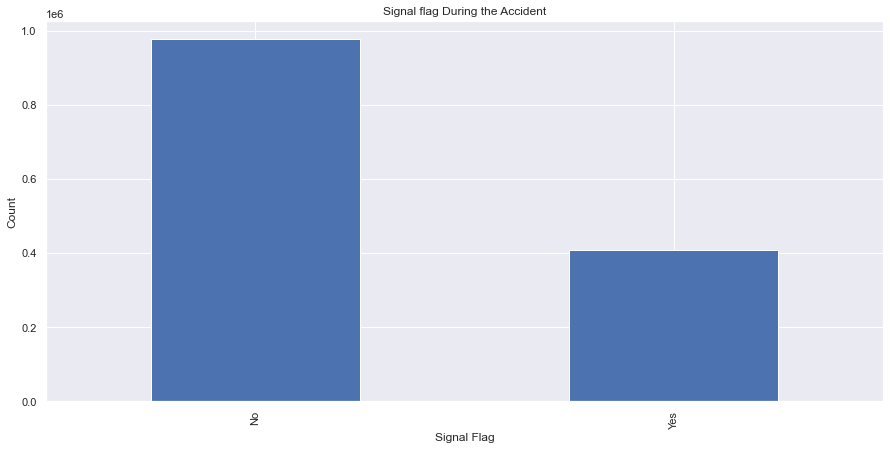

In [140]:
# Signal Flag during the accident
datamerge['SIGNAL_FLAG_DESC'].value_counts().plot(kind = 'bar',figsize=(15,7))
plt.xlabel('Signal Flag')
plt.ylabel('Count')
plt.title('Signal flag During the Accident')
plt.show()

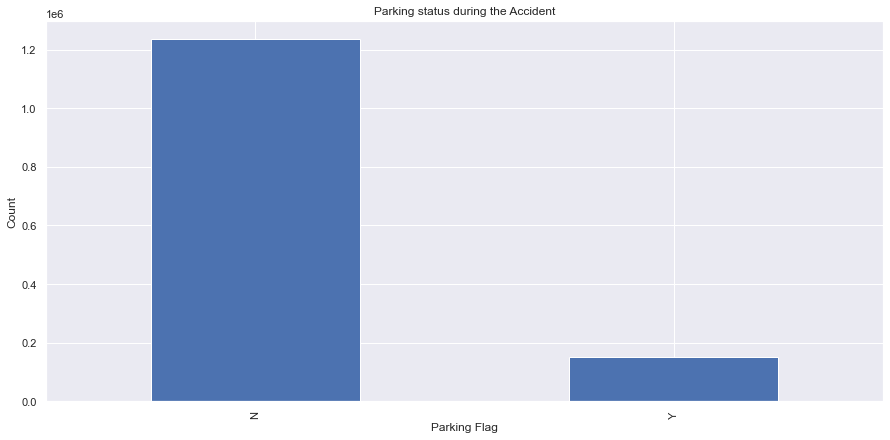

In [141]:
# Vehicle Parking status during the accident
datamerge['PARKED_FLAG'].value_counts().plot(kind = 'bar',figsize=(15,7))
plt.xlabel('Parking Flag')
plt.ylabel('Count')
plt.title('Parking status during the Accident')
plt.show()

In [67]:
collision = datamerge[datamerge.COLLISION_TYPE_DESC != 'Unknown']

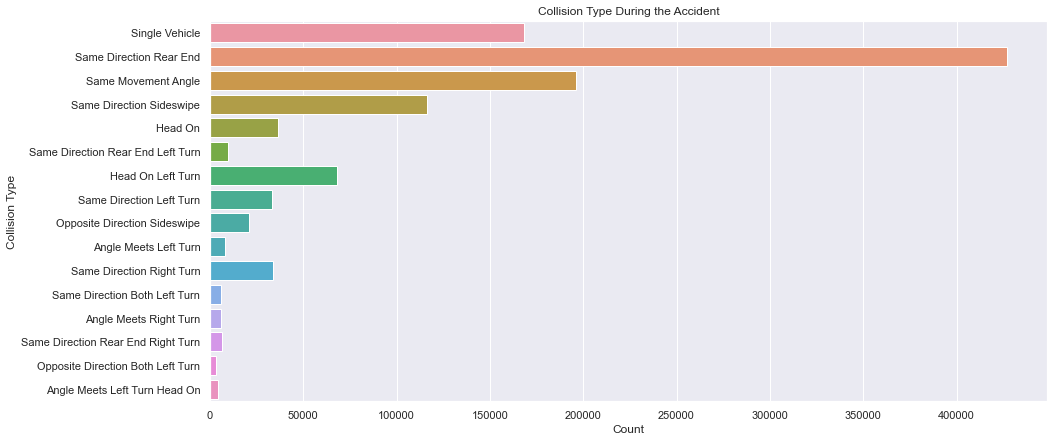

In [68]:
plt.figure(figsize=(15,7))
sns.countplot(y = collision['COLLISION_TYPE_DESC'])
plt.title('Collision Type During the Accident')
plt.xlabel('Count')
plt.ylabel('Collision Type')
plt.show()

In [96]:
surface = datamerge[datamerge.SURF_COND_DESC != 'Unknown']

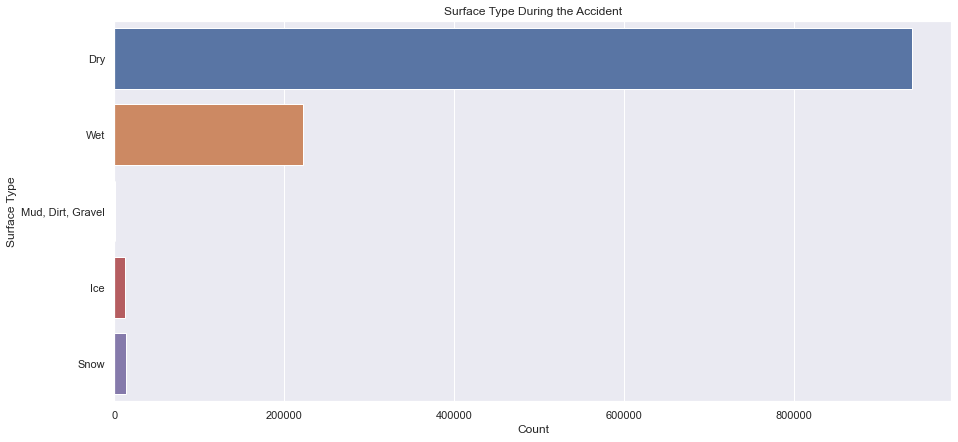

In [97]:
plt.figure(figsize=(15,7))
sns.countplot(y = surface['SURF_COND_DESC'])
plt.title('Surface Type During the Accident')
plt.xlabel('Count')
plt.ylabel('Surface Type')
plt.show()

In [99]:
weather = datamerge[datamerge.WEATHER_DESC != 'Unknown']

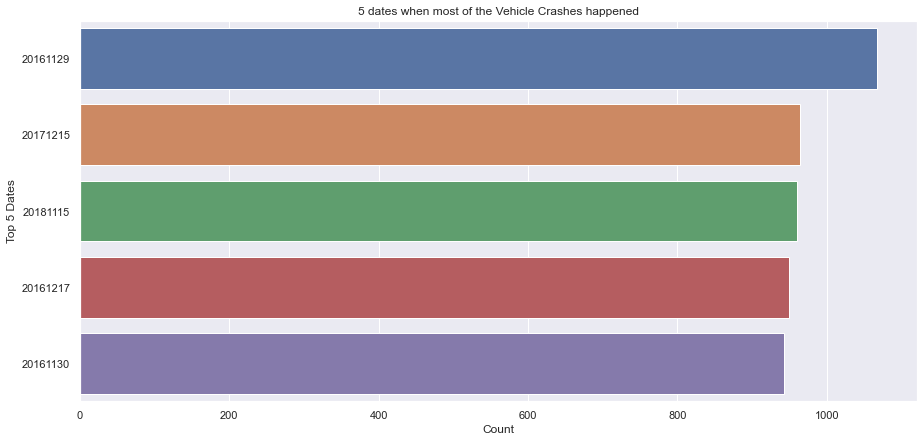

In [100]:
plt.figure(figsize=(15,7))
sns.countplot(y = weather['ACC_DATE'], order = weather['ACC_DATE'].value_counts().index[:5])
plt.title('5 dates when most of the Vehicle Crashes happened')
plt.xlabel('Count')
plt.ylabel('Top 5 Dates')
plt.show()

Highest number of accidents took place on 2016-11-29

In [101]:
most_accidents_happen = datamerge[datamerge.ACC_DATE == 20161129]

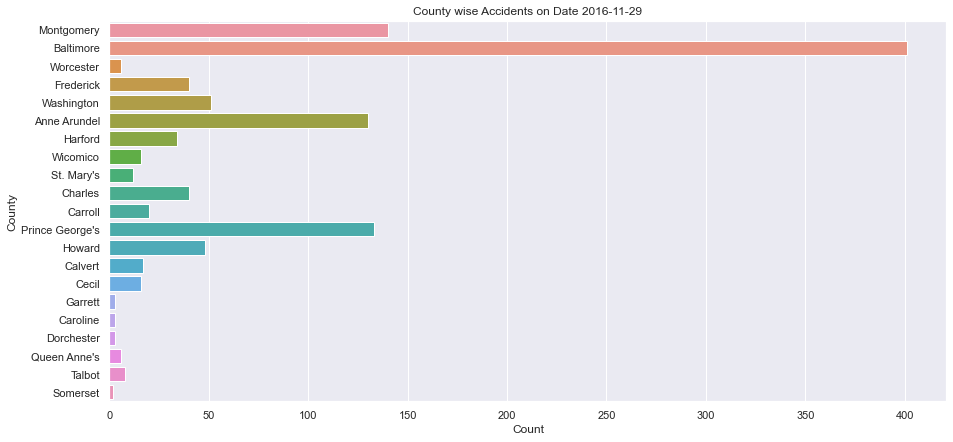

In [102]:
plt.figure(figsize=(15,7))
sns.countplot(y = most_accidents_happen['COUNTY_DESC'])
plt.title('County wise Accidents on Date 2016-11-29')
plt.xlabel('Count')
plt.ylabel('County')
plt.show()

In [103]:
body_desc = datamerge[datamerge.BODY_TYPE_DESC != 'Unknown']

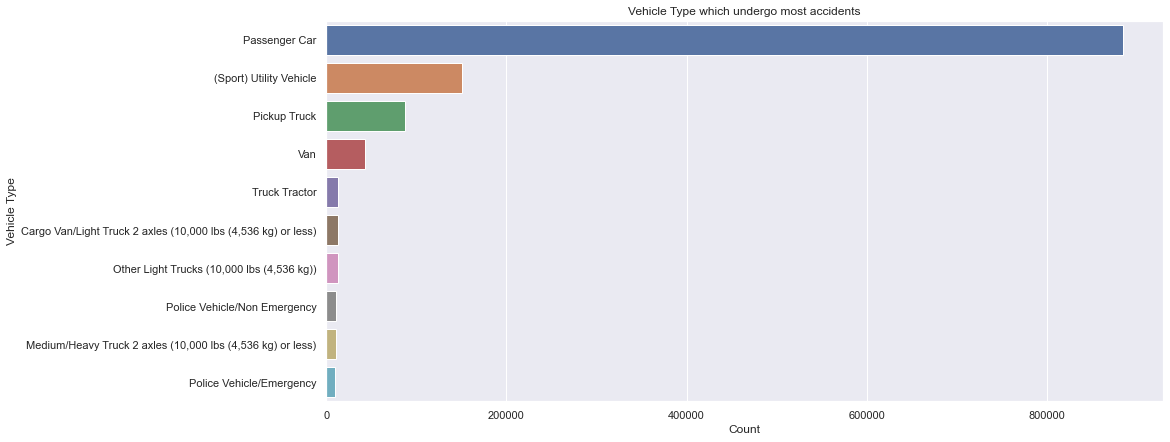

In [104]:
plt.figure(figsize=(15,7))
sns.countplot(y = body_desc['BODY_TYPE_DESC'], order = body_desc['BODY_TYPE_DESC'].value_counts().index[:10])
plt.title('Vehicle Type which undergo most accidents')
plt.xlabel('Count')
plt.ylabel('Vehicle Type')
plt.show()

Passenger Cars faced most of the accidents in Maryland followed by Utility Vehicles.

In [135]:
vehicle_make = datamerge[datamerge.VEH_MAKE != 'UNKNOWN']

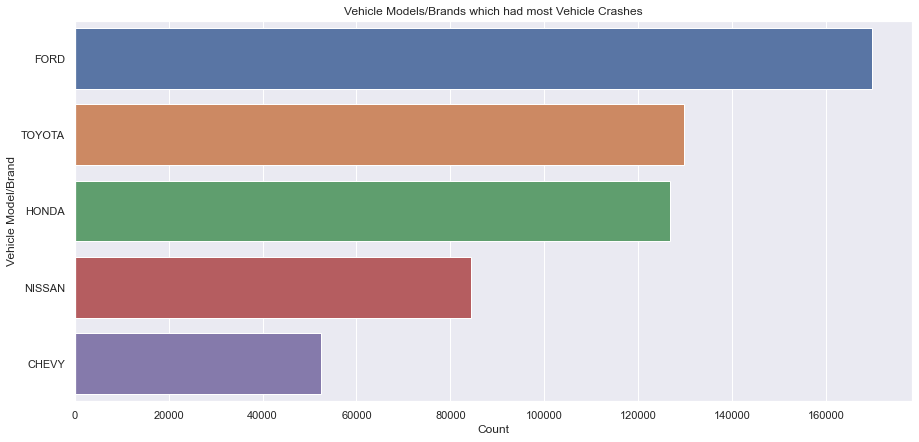

In [136]:
plt.figure(figsize=(15,7))
sns.countplot(y = vehicle_make['VEH_MAKE'], order = vehicle_make['VEH_MAKE'].value_counts().index[:5])
plt.title('Vehicle Models/Brands which had most Vehicle Crashes')
plt.xlabel('Count')
plt.ylabel('Vehicle Model/Brand')
plt.show()

Ford Vehicles faced most of the Accidents in Maryland State.

## Hypotheses:

- Assuming most of the accidents takes place when weather condition is rainy.
- Assuming most of the accidents takes place during Night time.
- Assuming most accidents takes place in Baltimore city of Maryland as the population is highest.
- Assuming most accidents takes place due to high driving speed.

### Does the weather conditions affect Vehicle Crashes?

In [105]:
weather = datamerge[datamerge.WEATHER_DESC != 'Unknown']

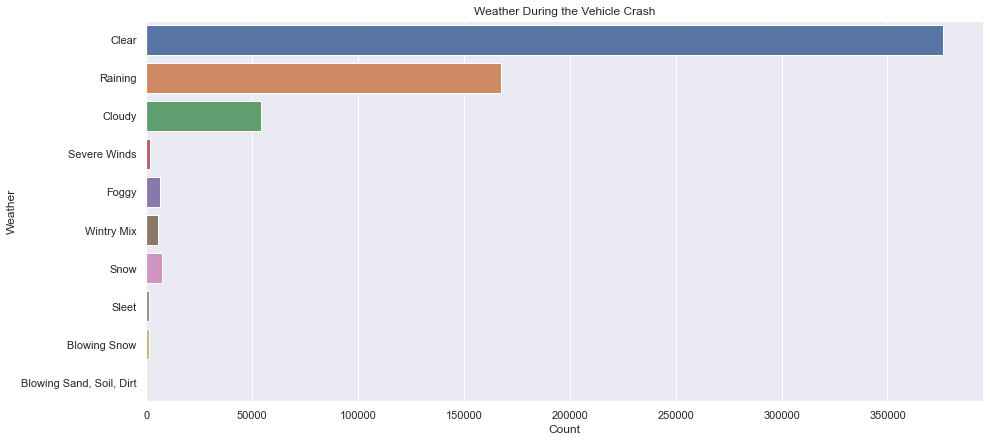

In [106]:
plt.figure(figsize=(15,7))
sns.countplot(y = weather['WEATHER_DESC'])
plt.title('Weather During the Vehicle Crash')
plt.xlabel('Count')
plt.ylabel('Weather')
plt.show()

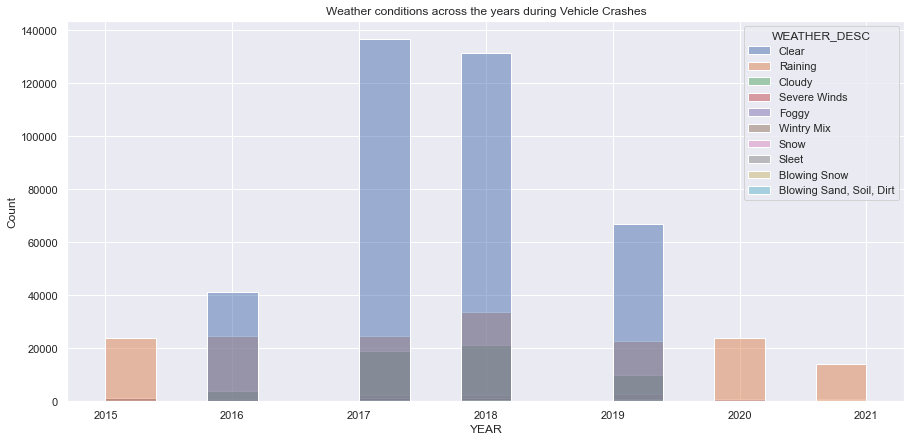

In [107]:
plt.figure(figsize=(15,7))
sns.histplot(x = weather.YEAR, bins = 15, hue = weather.WEATHER_DESC)
plt.title('Weather conditions across the years during Vehicle Crashes')
plt.show()

 **Observation** - Most of the accidents/Vehicle crashes happened during clear sky.
 
 *My Assumption about rainy weather affecting the Vehicle crashes is false.*

### Does the Day/Night/Light conditions affect Vehicle Crashes?

In [109]:
light_type = datamerge[datamerge.LIGHT_DESC != 'Unknown']

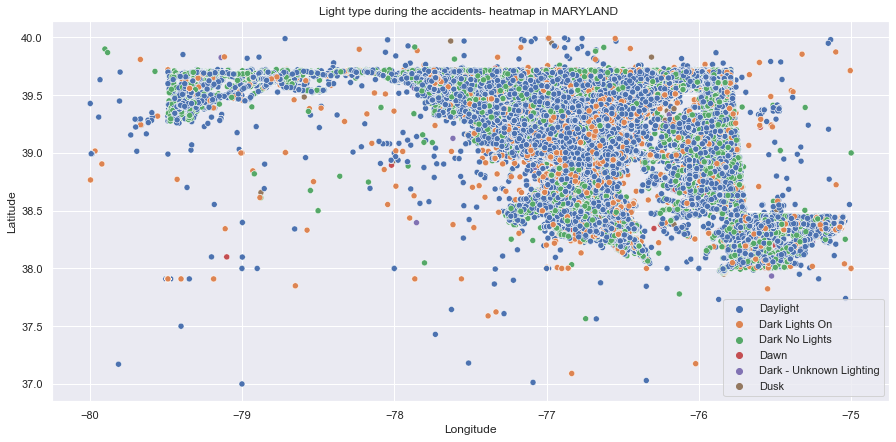

In [110]:
plt.figure(figsize=(15,7))
sns.scatterplot(y = light_type.LATITUDE, x = light_type.LONGITUDE, hue = light_type['LIGHT_DESC'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Light type during the accidents- heatmap in MARYLAND ")
plt.legend(loc = "best")
plt.show()

 **Observation** - Most of the accidents/Vehicle crashes happened during Daylight.
 
 *My Assumption about Daylight/Night affecting the Vehicle crashes is false.*

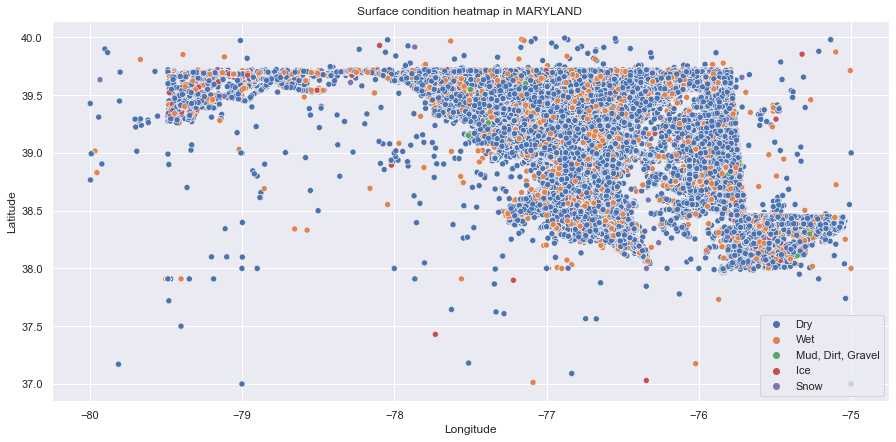

In [114]:
plt.figure(figsize=(15,7))
sns.scatterplot(y = surface.LATITUDE, x = surface.LONGITUDE, hue = surface['SURF_COND_DESC'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Surface condition heatmap in MARYLAND ")
plt.legend(loc = "best")
plt.show()

### Does Baltimore report most Vehicle Crashes?

In [113]:
county = datamerge[datamerge.COUNTY_DESC != 'Unknown']

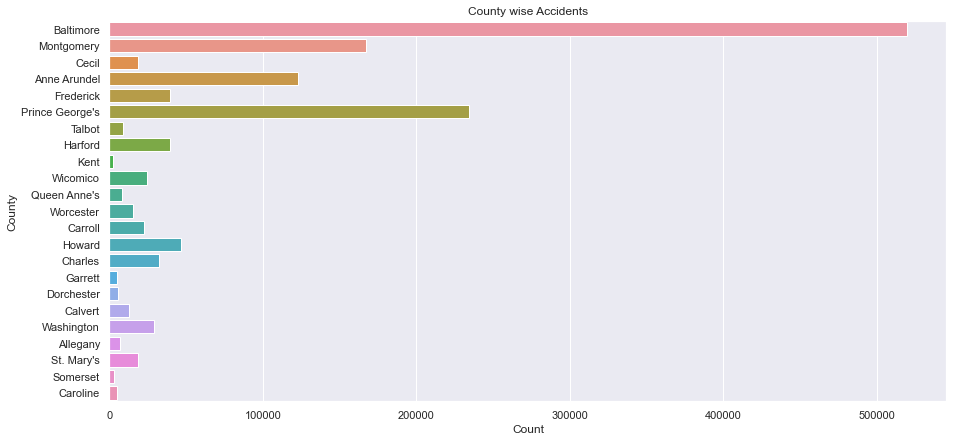

In [115]:
plt.figure(figsize=(15,7))
sns.countplot(y = county['COUNTY_DESC'])
plt.title('County wise Accidents')
plt.xlabel('Count')
plt.ylabel('County')
plt.show()

In [117]:
# Statistical Method 
county.COUNTY_DESC.value_counts()

Baltimore          519520
Prince George's    234612
Montgomery         166873
Anne Arundel       122725
Howard              46495
Harford             39125
Frederick           39124
Charles             32338
Washington          28788
Wicomico            24690
Carroll             22696
Cecil               18707
St. Mary's          18256
Worcester           15457
Calvert             12712
Talbot               8808
Queen Anne's         8379
Allegany             6664
Dorchester           5788
Caroline             4713
Garrett              4633
Somerset             3036
Kent                 2031
Name: COUNTY_DESC, dtype: int64

 **Observation** - Most of the accidents/Vehicle crashes took place in Baltimore .
 
 *My Assumption about most populous city having more accidents is true.*

### Does the Driving speed affect  Vehicle Crashes?

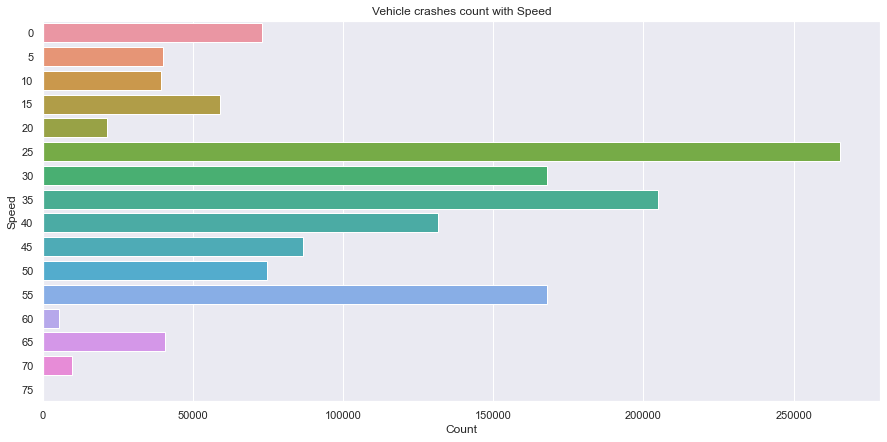

In [118]:
plt.figure(figsize=(15,7))
sns.countplot(y = datamerge['SPEED_LIMIT'])
plt.title('Vehicle crashes count with Speed')
plt.xlabel('Count')
plt.ylabel('Speed')
plt.show()

In [131]:
datamerge.SPEED_LIMIT.value_counts()

25    265490
35    204738
30    168015
55    167746
40    131426
45     86500
50     74503
0      72915
15     58874
65     40522
5      39921
10     39204
20     21347
70      9731
60      5194
75        58
Name: SPEED_LIMIT, dtype: int64

### Performing One Sample t-test :

- One Sample t-test (single sample t-test) is used to compare the sample mean (a random sample from a population) with the specific value (hypothesized or known mean of the population).


### Hypotheses :
- Null hypothesis: Sample mean is equal to the hypothesized or known population mean
- Alternative hypothesis: Sample mean is not equal to the hypothesized or known population mean (two-tailed or two-sided)


In [127]:
from scipy import stats as st

# t- test using scipy

_,p_value = st.ttest_1samp(a = datamerge['SPEED_LIMIT'], popmean = 55)

In [130]:
if (p_value <= 0.05):
    print("Hypothesis Rejected")
else :
    print("Hypothesis Accepted")

Hypothesis Rejected


#### Speed Limit is not the affecting factor for Vehicle Crashes. My Hypothesis is Rejected.

## Summary

- Most of the Accidents happened during Day time.
- Most of the Accidents took place when the weather conditions are good or when we have clear sky.
- Highest number of accidents took place in Baltimore.
- Speed Limit didnt affect the Vehicle Crashes in Maryland.
- Highest number of accidents happened on 2016-11-29.
- Passenger Cars faced most of the accidents.
- Majority of the accidents happened when they were not parked.
- Most of the Accidents hapened on Dry Surface.


## What I Learnt?
- Working on Large Datasets.
- Data Merging - Merging 2 datasets and working on them.
- Different types of Visualizations.
